In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

df = pd.read_csv("Incident Rate.csv")
df

,Unnamed: 0,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,8,NaN,NaN,Australian Capital Territory,Australia,2021-11-02 04:22:03,-35.473500,149.012400,1788,13,NaN,NaN,"Australian Capital Territory, Australia",417.659425,0.727069
1,9,NaN,NaN,New South Wales,Australia,2021-11-02 04:22:03,-33.868800,151.209300,75578,576,NaN,NaN,"New South Wales, Australia",930.992855,0.762127
2,10,NaN,NaN,Northern Territory,Australia,2021-11-02 04:22:03,-12.463400,130.845600,225,0,NaN,NaN,"Northern Territory, Australia",91.612378,0.000000
3,11,NaN,NaN,Queensland,Australia,2021-11-02 04:22:03,-27.469800,153.025100,2090,7,NaN,NaN,"Queensland, Australia",40.856221,0.334928
4,12,NaN,NaN,South Australia,Australia,2021-11-02 04:22:03,-34.928500,138.600700,918,4,NaN,NaN,"South Australia, Australia",52.263023,0.435730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100675,120167,NaN,NaN,Scotland,United Kingdom,2021-12-01 04:22:29,56.490700,-4.202600,727549,9572,NaN,NaN,"Scotland, United Kingdom",13317.024509,1.315650
100676,120168,NaN,NaN,Turks and Caicos Islands,United Kingdom,2021-12-01 04:22:29,21.694000,-71.797900,3096,24,NaN,NaN,"Turks and Caicos Islands, United Kingdom",7996.280800,0.775194
100677,120169,NaN,NaN,Unknown,United Kingdom,2021-12-01 04:22:29,NaN,NaN,0,0,NaN,NaN,"Unknown, United Kingdom",NaN,NaN
100678,120170,NaN,NaN,Wales,United Kingdom,2021-12-01 04:22:29,52.130700,-3.783700,508932,6405,NaN,NaN,"Wales, United Kingdom",16215.255209,1.258518


In [22]:
IR = pd.DataFrame(df.groupby('Country_Region')['Incident_Rate'].agg('sum'))
IR.index.name = 'Country Name'
IR

,Incident_Rate
Country Name,
Australia,9.991261e+04
Brazil,9.650690e+06
Israel,4.636041e+05
Italy,5.057224e+06
New Zealand,5.886673e+03
South Africa,1.484085e+05
US,1.460918e+09
United Kingdom,4.277304e+06
Vietnam,3.258448e+04


In [17]:
Vacc = pd.read_csv("Percentage Vaccinated.csv")
Vacc.set_index("Unnamed: 0", inplace = True)
Vacc.index.name = 'Country Name'
Vacc

,People_fully_vaccinated,Population,Percentage_Vacc
Country Name,,,
Australia,19375276.0,25687041.0,75.428213
Brazil,140151965.0,212559409.0,65.935432
Israel,5798867.0,9216900.0,62.915590
Italy,44343143.0,59554023.0,74.458686
New Zealand,3766864.0,5084300.0,74.088154
South Africa,15410168.0,59308690.0,25.982985
US,202845886.0,329484123.0,61.564692
United Kingdom,46804609.0,67215293.0,69.633869
Vietnam,53224715.0,97338583.0,54.679977


In [19]:
frames = [Vacc, IR]
World_Vacc = pd.concat(frames, axis=1)
World_Vacc

,People_fully_vaccinated,Population,Percentage_Vacc,Incident_Rate
Country Name,,,,
Australia,19375276.0,25687041.0,75.428213,9.991261e+04
Brazil,140151965.0,212559409.0,65.935432,9.650690e+06
Israel,5798867.0,9216900.0,62.915590,4.636041e+05
Italy,44343143.0,59554023.0,74.458686,5.057224e+06
New Zealand,3766864.0,5084300.0,74.088154,5.886673e+03
South Africa,15410168.0,59308690.0,25.982985,1.484085e+05
US,202845886.0,329484123.0,61.564692,1.460918e+09
United Kingdom,46804609.0,67215293.0,69.633869,4.277304e+06
Vietnam,53224715.0,97338583.0,54.679977,3.258448e+04


The r-squared value is: 0.0007173234721115515
The correlation between the Incident Rate and Population Vaccinated is: -0.026782895140584625


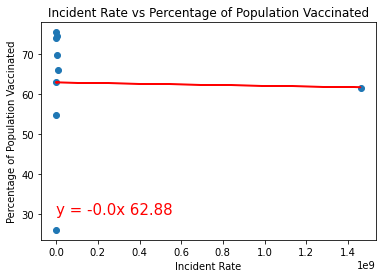

In [20]:
x_axis = World_Vacc["Incident_Rate"]
y_axis = World_Vacc["Percentage_Vacc"]
plt.xlabel("Incident Rate")
plt.ylabel("Percentage of Population Vaccinated")
plt.title("Incident Rate vs Percentage of Population Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(11,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between the Incident Rate and Population Vaccinated is: {rvalue}")
plt.savefig("Incident Rate vs Population Vaccinated.png")

In [21]:
jhu_df = pd.read_csv('jhu_data.csv')
jhu_df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,11/2/2021 4:22,33.939110,67.709953,156284,7281,NaN,NaN,Afghanistan,401.465863,4.658826
1,NaN,NaN,NaN,Albania,11/2/2021 4:22,41.153300,20.168300,185497,2931,NaN,NaN,Albania,6445.791924,1.580079
2,NaN,NaN,NaN,Algeria,11/2/2021 4:22,28.033900,1.659600,206566,5924,NaN,NaN,Algeria,471.062912,2.867849
3,NaN,NaN,NaN,Andorra,11/2/2021 4:22,42.506300,1.521800,15516,130,NaN,NaN,Andorra,20081.537570,0.837845
4,NaN,NaN,NaN,Angola,11/2/2021 4:22,-11.202700,17.873900,64458,1713,NaN,NaN,Angola,196.122054,2.657544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120175,NaN,NaN,NaN,Vietnam,12/1/2021 4:22,14.058324,108.277199,1238082,25252,NaN,NaN,Vietnam,1271.933453,2.039606
120176,NaN,NaN,NaN,West Bank and Gaza,12/1/2021 4:22,31.952200,35.233200,460053,4796,NaN,NaN,West Bank and Gaza,9018.143198,1.042489
120177,NaN,NaN,NaN,Yemen,12/1/2021 4:22,15.552727,48.516388,10004,1950,NaN,NaN,Yemen,33.541242,19.492203
120178,NaN,NaN,NaN,Zambia,12/1/2021 4:22,-13.133897,27.849332,210169,3667,NaN,NaN,Zambia,1143.219664,1.744786


In [24]:
IR_world = pd.DataFrame(jhu_df.groupby('Country_Region')['Incident_Rate'].agg('sum'))
IR_world.index.name = 'Country Name'
IR_world

,Incident_Rate
Country Name,
Afghanistan,12076.587081
Albania,201594.725136
Algeria,14251.674698
Andorra,622714.036140
Angola,5923.091116
...,...
Vietnam,32584.480916
West Bank and Gaza,268830.144411
Yemen,997.801647


In [30]:
Vacc_df = pd.read_csv("World Vaccinated.csv")
Vacc_df.set_index("Unnamed: 0", inplace = True)
Vacc_df.index.name = 'Country Name'
Vacc_df

,Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated,Percentage_Vacc
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,211585.0,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,3566192.0,9.160914
Albania,87328.0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,998326.0,35.180282
Algeria,173859.0,DZA,"Population, total",SP.POP.TOTL,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,...,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,5391232.0,12.294421
Andorra,3777.0,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,50333.0,65.143338
Angola,50068.0,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,3315757.0,10.088633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,40848.0,UZB,"Population, total",SP.POP.TOTL,8526299.0,8813619.0,9113629.0,9428906.0,9762819.0,10116870.0,...,30243200.0,30757700.0,31298900.0,31847900.0,32388600.0,32956100.0,33580350.0,34232050.0,5882086.0,17.182979
Vanuatu,30.0,VUT,"Population, total",SP.POP.TOTL,63689.0,65700.0,67793.0,69944.0,72116.0,74268.0,...,256637.0,263888.0,271128.0,278326.0,285499.0,292675.0,299882.0,307150.0,47345.0,15.414293
Vietnam,701736.0,VNM,"Population, total",SP.POP.TOTL,32670048.0,33666111.0,34683410.0,35721213.0,36780001.0,37858947.0,...,90752593.0,91713850.0,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0,53224715.0,54.679977


In [33]:
frames = [Vacc_df, IR_world]
World_df = pd.concat(frames, axis=1)
World_df_total = World_df.dropna()
World_df_total

,Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,People_fully_vaccinated,Percentage_Vacc,Incident_Rate
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,211585.0,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,3566192.0,9.160914,12076.587081
Albania,87328.0,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0,998326.0,35.180282,201594.725136
Algeria,173859.0,DZA,"Population, total",SP.POP.TOTL,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,...,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0,5391232.0,12.294421,14251.674698
Andorra,3777.0,AND,"Population, total",SP.POP.TOTL,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,...,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,50333.0,65.143338,622714.036140
Angola,50068.0,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,3315757.0,10.088633,5923.091116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,40848.0,UZB,"Population, total",SP.POP.TOTL,8526299.0,8813619.0,9113629.0,9428906.0,9762819.0,10116870.0,...,30757700.0,31298900.0,31847900.0,32388600.0,32956100.0,33580350.0,34232050.0,5882086.0,17.182979,17024.826319
Vanuatu,30.0,VUT,"Population, total",SP.POP.TOTL,63689.0,65700.0,67793.0,69944.0,72116.0,74268.0,...,263888.0,271128.0,278326.0,285499.0,292675.0,299882.0,307150.0,47345.0,15.414293,61.500615
Vietnam,701736.0,VNM,"Population, total",SP.POP.TOTL,32670048.0,33666111.0,34683410.0,35721213.0,36780001.0,37858947.0,...,91713850.0,92677082.0,93640435.0,94600643.0,95545959.0,96462108.0,97338583.0,53224715.0,54.679977,32584.480916


The r-squared value is: 0.10643894323245176
The correlation between the Incident Rate and Population Vaccinated is: 0.32624981721443425


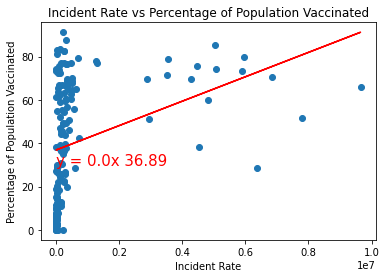

In [34]:
x_axis = World_df_total["Incident_Rate"]
y_axis = World_df_total["Percentage_Vacc"]
plt.xlabel("Incident Rate")
plt.ylabel("Percentage of Population Vaccinated")
plt.title("Incident Rate vs Percentage of Population Vaccinated")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(11,30),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between the Incident Rate and Population Vaccinated is: {rvalue}")
plt.savefig("Incident Rate vs Population Vaccinated.png")